The following function $SplineCoef()$ produces the coefficients, $a$, $b$, $c$, and $d$, for our natural spline function.

In [44]:
import numpy as np

def SplineCoef(dataX,dataY):
    
    n = len(dataX) - 1
    h = np.zeros(n)
    
    for j in range(0, n):
        h[j] = dataX[j + 1] - dataX[j]        
        
    A = np.zeros([n + 1, n + 1])
    A[0, 0] = 1
    A[n, n] = 1
    
    
    for j in range(0, n - 1):
        A[j + 1][j] = h[j]
    for j in range(1, n - 1):
        A[j][j + 1] = h[j]
    for j in range(1, n):
        A[j][j] = 2 * (A[j + 1][j] + A[j][j - 1])
        
    bb = np.zeros([n + 1, 1])
    a = np.reshape(dataY, (n + 1, 1))

    for j in range(1, n):
        bb[j] = 3 / h[j] * (a[j + 1] - a[j]) - 3 / h[j - 1] * (a[j] - a[j - 1])
    
    c = np.linalg.solve(A, bb)
    b = np.zeros([n, 1])
    d = np.zeros([n, 1])
      
    for j in range(0, n):
        b[j] = 1 / h[j] * (a[j + 1] - a[j]) - h[j] / 3 * (2 * c[j] + c[j + 1])
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
  

    return a, b, c, d

     

The next function $Spline()$ calls for the four coeffients from the previous function using the inputs of $dataX$ and $dataY$. We take those coefficients and produce the natural spline function.

In [45]:
def Spline(dataX, dataY, x):
    a, b, c, d = SplineCoef(dataX, dataY)
    
    n = len(dataX) - 1
    output = []

    for positionX in x:
        for j in range (0, n):
            if dataX[j] <= positionX and dataX[j + 1] >= positionX:
                k = j
        xk = dataX[k]
        y = a[k] + (b[k] * (positionX - xk)) + (c[k] * (positionX - xk)**2) + (d[k] * (positionX - xk)**3)
        output.append(y)
    return output

We have three piecewise spline functions $S_{0}$, $S_{1}$, and $S_{2}$ that we call the $Spline()$ function with their specific parameters. These spline functions are going to create three curves that make the shape of a pumpkin.

In [46]:
x_0 = np.linspace(-13, 13, 100)
x_1 = np.linspace(0, 13, 100)
x_2 = np.linspace(-13, 0, 100)

S_0 = Spline([-13, -12.5, -12, -8, 8, 12, 12.5, 13], [0, -4, -7, -9, -9, -7, -4, 0], x_0)
S_1 = Spline([0, 1, 4, 8, 12, 13], [2, 3, 5, 6, 4, 0], x_1)
S_2 = Spline([-13, -12, -8, -4, -1, 0], [0, 4, 6, 5, 3, 2], x_2)


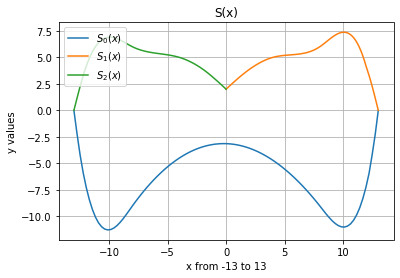

In [47]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(x_0, S_0, label = '$S_{0}(x)$')
plt.plot(x_1, S_1, label = '$S_{1}(x)$')
plt.plot(x_2, S_2, label = '$S_{2}(x)$')

plt.title('S(x)')
plt.xlabel('x from -13 to 13')
plt.ylabel('y values')
plt.legend(loc = 'upper left')

plt.grid() 
plt.show()

Obviously, this VAGUELY looks like a pumpkin. We have the general shape; however, $S_{0}$ takes a sharp peak at $x = 0$, $S_{1}$ takes a sharp peak at $x = 10$, and $S_{2}$ takes a sharp peak at $x = -10$. We can compare this to the general shape of the data points inputted below.

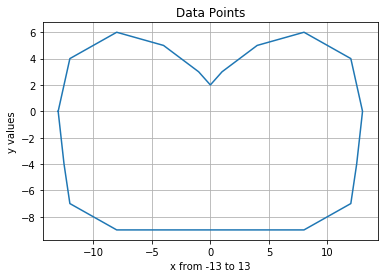

In [48]:
plt.plot([-13, -12.5, -12, -8, 8, 12, 12.5, 13, 12, 8, 4, 1, 0, -1, -4, -8, -12, -13],
         [0, -4, -7, -9, -9, -7, -4, 0, 4, 6, 5, 3, 2, 3, 5, 6, 4, 0])

plt.title('Data Points')
plt.xlabel('x from -13 to 13')
plt.ylabel('y values')

plt.grid() 
plt.show()

Below, we compare the values in the first spline curve, $S_{0}$, with the corresponding $y$-values in our data-set. We observe that while the points are in the same general area of our plot, $S_{0}$ has vastly different values and takes the shape of a negative squared polynomial than the data points.

In [49]:
print('S_0 for each data point')
for n in range(0, 99, 13):
    print(S_0[n])

print('\nf(x) data points')
yData = [0, -4, -7, -9, -9, -7, -4, 0]
for  n in range(0, len(yData)):
    print(yData[n])

S_0 for each data point
[0.]
[-11.08872391]
[-6.53732012]
[-3.74580433]
[-3.19710194]
[-4.75963597]
[-8.30182943]
[-10.34107189]

f(x) data points
0
-4
-7
-9
-9
-7
-4
0
